In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer


# load and look at data

In [2]:
data = pd.read_csv('data/preprocessed.csv')
data.head().T

/var/folders/bn/jw4b363n6cz8jy9jwmhp7q0c0000gn/T/ipykernel_17608/736414251.py:1: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/preprocessed.csv')


,0,1,2,3,4
code,00000000000000225,00000000000000225,00000000000026772226,00000000000026772226,0000000000100
food_groups_en_x,fruits and vegetables,vegetables,milk and dairy products,dairy desserts,fats and sauces
countries_en_x,france,france,france,france,france
product_name,jeunes pousses,jeunes pousses,Skyr,Skyr,moutarde au moût de raisin
countries_en_y,France,France,France,France,France
brands,endives,endives,Danone,Danone,courte paille
abbreviated_product_name,NaN,NaN,NaN,NaN,NaN
generic_name,NaN,NaN,NaN,NaN,NaN
quantity,NaN,NaN,480 g,480 g,100g
ecoscore_score,79.0,79.0,67.0,67.0,54.0


In [3]:
data.shape

(2540360, 23)

In [4]:
def non_na_rows(df, col):
    return df[~df[col].isna()][[col]].reset_index(drop=True)

In [5]:
non_na_rows(data, 'ecoscore_score')

,ecoscore_score
0,79.0
1,79.0
2,67.0
3,67.0
4,54.0
...,...
1685246,-16.0
1685247,-16.0
1685248,-16.0
1685249,-16.0


# EDA 

In [6]:
df=data

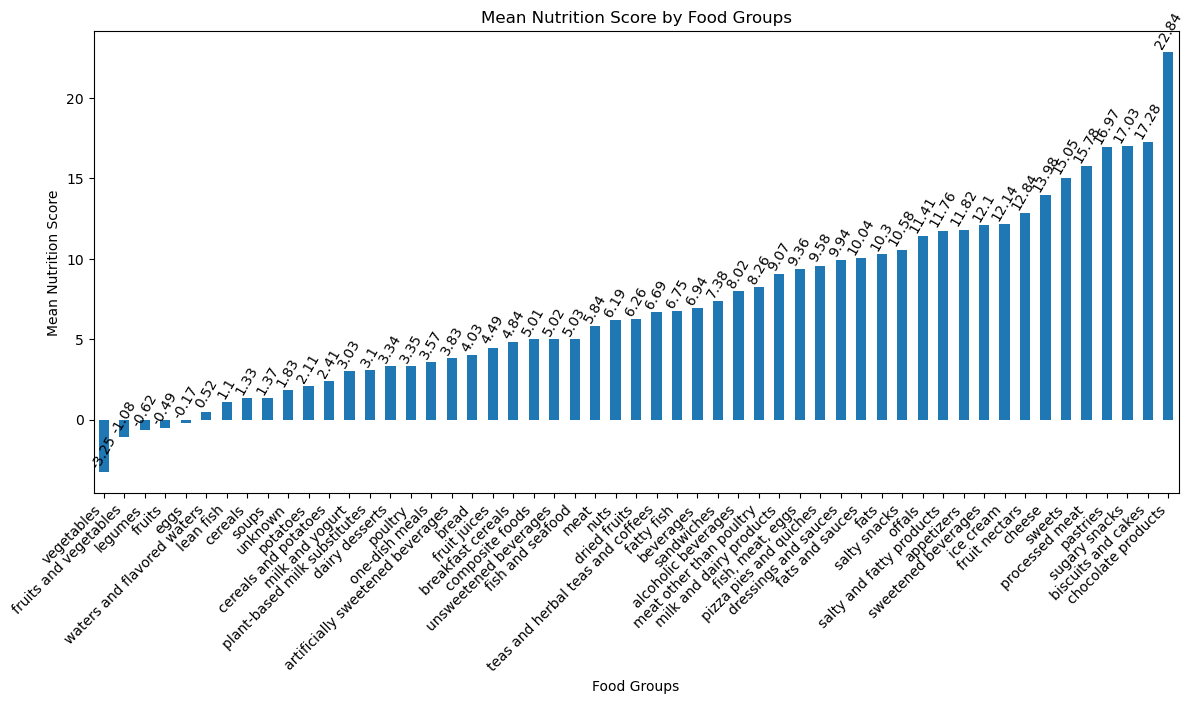

In [7]:
# Adjust figure size
plt.figure(figsize=(14, 6))

# Group by 'food_groups_en_1' and calculate mean of 'nutriscore_score'
grouped_data = df.groupby(['food_groups_en_x'])['nutriscore_score'].mean().sort_values()

# Plot bar graph
bar_plot = grouped_data.plot(kind='bar')

# Add values above bars
for i in bar_plot.patches:
    bar_plot.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, \
                  round(i.get_height(), 2), ha='center', va='bottom', rotation=60)

# Add labels and title
plt.xlabel('Food Groups')
plt.ylabel('Mean Nutrition Score')
plt.title('Mean Nutrition Score by Food Groups')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

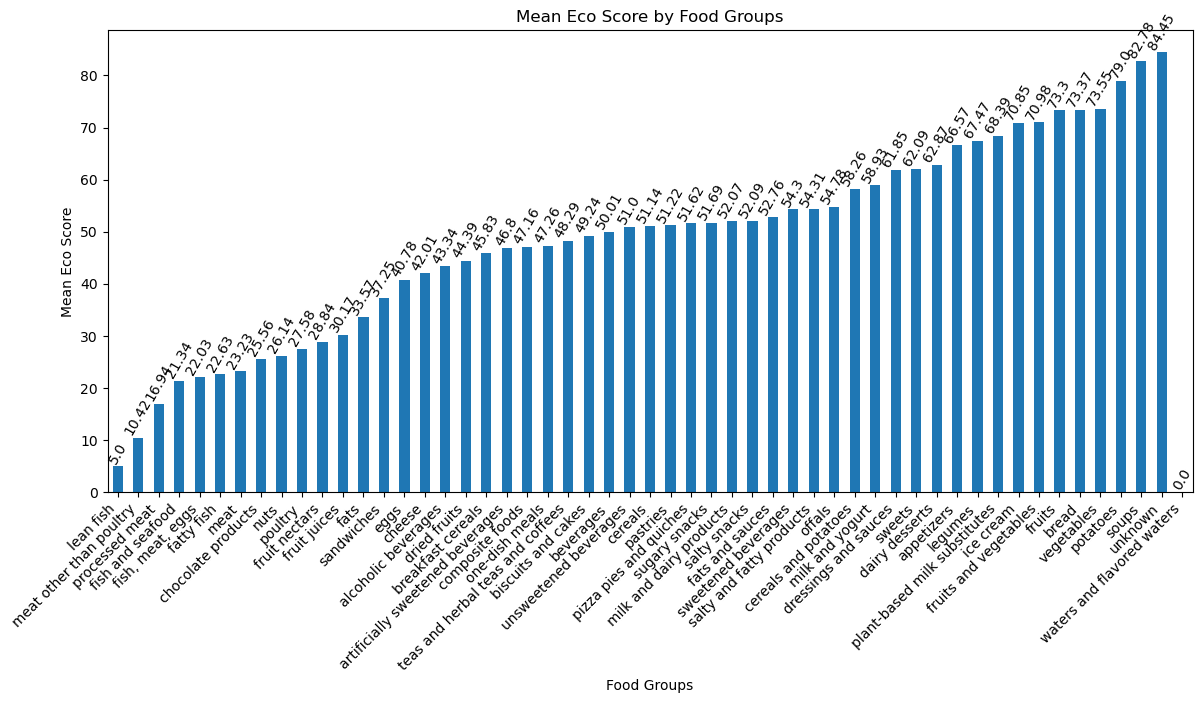

In [8]:
# Adjust figure size
plt.figure(figsize=(14, 6))

# Group by 'food_groups_en_1' and calculate mean of 'nutriscore_score'
grouped_data = df.groupby(['food_groups_en_x'])['ecoscore_score'].mean().sort_values()

# Plot bar graph
bar_plot = grouped_data.plot(kind='bar')

# Add values above bars
for i in bar_plot.patches:
    bar_plot.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, \
                  round(i.get_height(), 2), ha='center', va='bottom', rotation=60)

# Add labels and title
plt.xlabel('Food Groups')
plt.ylabel('Mean Eco Score')
plt.title('Mean Eco Score by Food Groups')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

# Make broader food groups

In [9]:
df.food_groups_en_x.unique()

array(['fruits and vegetables', 'vegetables', 'milk and dairy products',
       'dairy desserts', 'fats and sauces', 'dressings and sauces',
       'beverages', 'fruit juices', 'sugary snacks', 'sweets',
       'composite foods', 'one-dish meals', 'pizza pies and quiches',
       'fruits', 'fish‚ meat‚ eggs', 'meat', 'poultry',
       'sweetened beverages', 'cheese', 'cereals and potatoes', 'bread',
       'fish and seafood', 'fatty fish', 'legumes',
       'meat other than poultry', 'biscuits and cakes', 'salty snacks',
       'salty and fatty products', 'dried fruits', 'fats', 'pastries',
       'unsweetened beverages', 'nuts', 'cereals', 'alcoholic beverages',
       'breakfast cereals', 'appetizers', 'processed meat', 'unknown',
       'teas and herbal teas and coffees', 'milk and yogurt', 'lean fish',
       'sandwiches', 'chocolate products', 'eggs',
       'plant-based milk substitutes', 'ice cream', 'soups', 'potatoes',
       'waters and flavored waters', 'artificially sweeten

In [10]:
# Define a dictionary to map specific food groups to broader categories
# (groups made to follow pnns_groups_1 from full data)
group_mapping = {
    'Unknown': ['unknown', 'na', ''],
    'Fruits and vegetables': ['fruits', 'vegetables', 'dried fruits','fruits and vegetables', 'legumes'],
    'Sugary snacks': ['sugary snacks', 'chocolate products', 'sweets', 'biscuits and cakes', 'pastries'],
    'Beverages': ['beverages', 'sweetened beverages', 'fruit juices', 'unsweetened beverages', 'waters and flavored waters', 'artificially sweetened beverages', 'fruit nectars', 'teas and herbal teas and coffees', 'alcoholic beverages'],
    'Composite foods': ['composite foods', 'sandwiches', 'pizza pies and quiches', 'one-dish meals', 'soups', 'appetizers'],
    'Fish meat eggs': ['fish and seafood', 'fatty fish', 'meat', 'meat other than poultry', 'processed meat', 'lean fish', 'eggs', 'offals', 'poultry', 'fish‚ meat‚ eggs', 'fish'],
    'Fat and sauces': ['fats and sauces', 'dressings and sauces', 'fats'],
    'Salty snacks': ['salty snacks', 'salty and fatty products', 'bread', 'nuts'],
    'Cereals and potatoes': ['cereals and potatoes', 'breakfast cereals', 'cereals', 'potatoes'],
    'Milk and dairy products': ['milk and dairy products', 'dairy desserts', 'milk and yogurt', 'cheese', 'ice cream', 'plant-based milk substitutes']
}

# Function to map food groups to their respective categories
def map_food_group(group):
    for category, food_groups in group_mapping.items():
        if group in food_groups:
            return category
        else: 
            with open("unknown_groups.txt", "w") as file:
                file.write(group + "\n")                
    return 'Unknown'  # If no match found, assign 'Unknown'

# Create the new column
df['food_group_category'] = df['food_groups_en_x'].apply(map_food_group)
df.food_group_category.unique()

array(['Fruits and vegetables', 'Milk and dairy products',
       'Fat and sauces', 'Beverages', 'Sugary snacks', 'Composite foods',
       'Fish meat eggs', 'Cereals and potatoes', 'Salty snacks',
       'Unknown'], dtype=object)

In [11]:
df[df['food_group_category'] == 'Unknown']

,code,food_groups_en_x,countries_en_x,product_name,countries_en_y,brands,abbreviated_product_name,generic_name,quantity,ecoscore_score,...,nutriscore_grade,nova_group,food_groups_en_y,sodium_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,proteins_100g,food_group_category
350,0000105000066,unknown,united states,Herbal Tea Cinnamon,United States,NaN,NaN,NaN,NaN,79.0,...,c,NaN,Unknown,0.4,0.0,0.0,0.000000,60.000000,0.0,Unknown
2359,0004330432210,unknown,united kingdom,NaN,United Kingdom,NaN,NaN,NaN,NaN,79.0,...,unknown,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
7519,0011110086259,unknown,united states,Iced Tea Gallon Sized Bags,United States,Kroger,NaN,NaN,24 1oz bags,79.0,...,unknown,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
7522,0011110086471,unknown,united states,Chamomile with Blueberry,United States,Simple Truth Organic,NaN,NaN,NaN,79.0,...,unknown,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
7906,0011110106155,unknown,united states,Herbal Tea,United States,Simple Truth,NaN,NaN,NaN,79.0,...,e,NaN,Unknown,0.0,0.0,0.0,33.333333,33.333333,0.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523469,9310645233925,unknown,australia,Cup Tea Bags,Australia,Coles,NaN,NaN,NaN,79.0,...,unknown,NaN,Unknown,NaN,0.0,0.0,0.000000,0.000000,0.0,Unknown
2525165,9312631120240,unknown,chile,Dilmah Ceylon Tea,Chile,Dilmah Ceylon Tea Company PLC,NaN,NaN,20 g,94.0,...,unknown,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
2525921,9315915004014,unknown,australia,Stinging Nettle Teabags,Australia,NaN,NaN,NaN,NaN,79.0,...,unknown,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
2527522,9330462002924,unknown,australia,Melbourne Breakfast loose leaf flavoured black...,Australia,NaN,NaN,NaN,250 g,79.0,...,unknown,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,Unknown


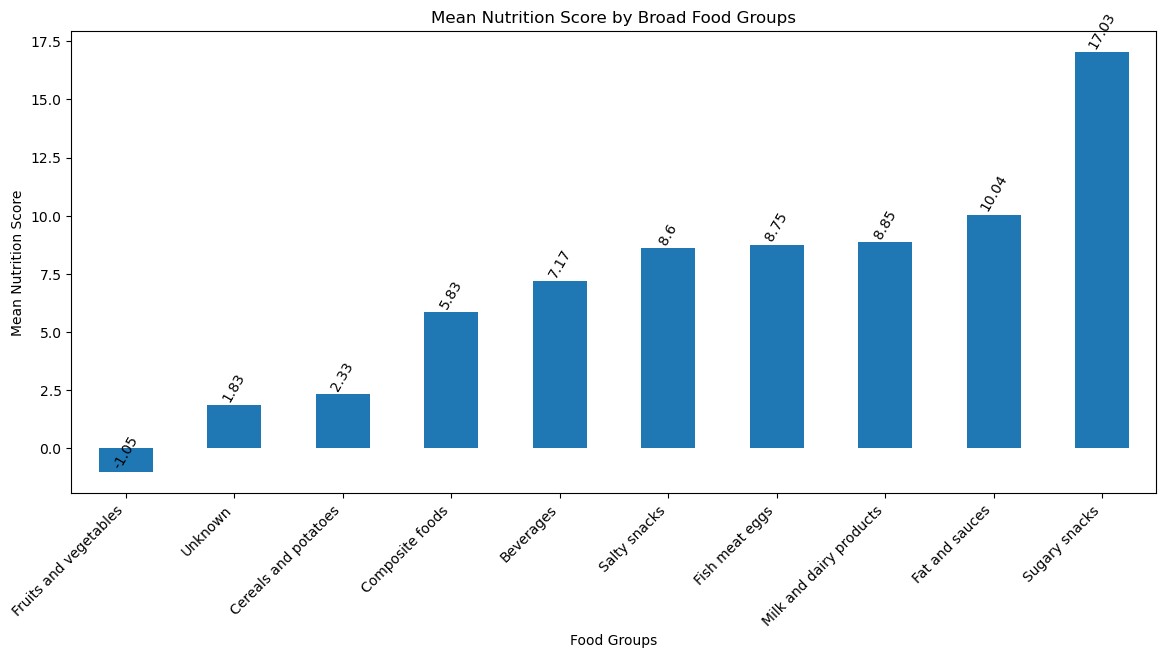

In [12]:
# Adjust figure size
plt.figure(figsize=(14, 6))

# Group by 'food_groups_en_1' and calculate mean of 'nutriscore_score'
grouped_data_nutri = df.groupby(['food_group_category'])['nutriscore_score'].mean().sort_values()

# Plot bar graph
bar_plot = grouped_data_nutri.plot(kind='bar')

# Add values above bars
for i in bar_plot.patches:
    bar_plot.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, \
                  round(i.get_height(), 2), ha='center', va='bottom', rotation=60)

# Add labels and title
plt.xlabel('Food Groups')
plt.ylabel('Mean Nutrition Score')
plt.title('Mean Nutrition Score by Broad Food Groups')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

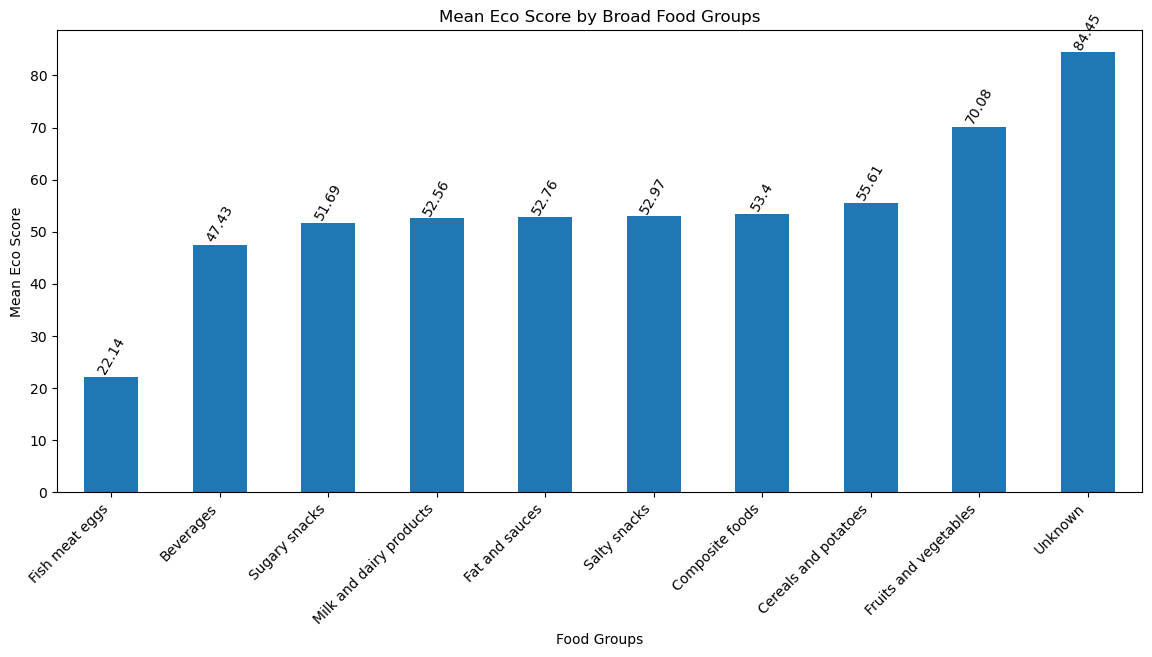

In [13]:
# Adjust figure size
plt.figure(figsize=(14, 6))

# Group by 'food_groups_en_1' and calculate mean of 'nutriscore_score'
grouped_data_eco = df.groupby(['food_group_category'])['ecoscore_score'].mean().sort_values()

# Plot bar graph
bar_plot = grouped_data_eco.plot(kind='bar')

# Add values above bars
for i in bar_plot.patches:
    bar_plot.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, \
                  round(i.get_height(), 2), ha='center', va='bottom', rotation=60)

# Add labels and title
plt.xlabel('Food Groups')
plt.ylabel('Mean Eco Score')
plt.title('Mean Eco Score by Broad Food Groups')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

# Spider plot

In [14]:
# Group by 'broad_food_group' and calculate mean of 'ecoscore_score' and 'nutriscore_score'
grouped_data_eco = df.groupby(['food_group_category'])['ecoscore_score'].mean().sort_values()
grouped_data_nutri = df.groupby(['food_group_category'])['nutriscore_score'].mean().sort_values()

# Combine the two series into one DataFrame
spider_df = pd.concat([grouped_data_eco, grouped_data_nutri], axis=1)
spider_df.columns = ['Mean Eco Score', 'Mean Nutrition Score']
spider_df

,Mean Eco Score,Mean Nutrition Score
food_group_category,,
Fish meat eggs,22.140568,8.749616
Beverages,47.426220,7.167586
Sugary snacks,51.688059,17.032179
Milk and dairy products,52.557416,8.848716
Fat and sauces,52.762949,10.043266
Salty snacks,52.970228,8.601831
Composite foods,53.404445,5.830679
Cereals and potatoes,55.613801,2.328675
Fruits and vegetables,70.084408,-1.051330


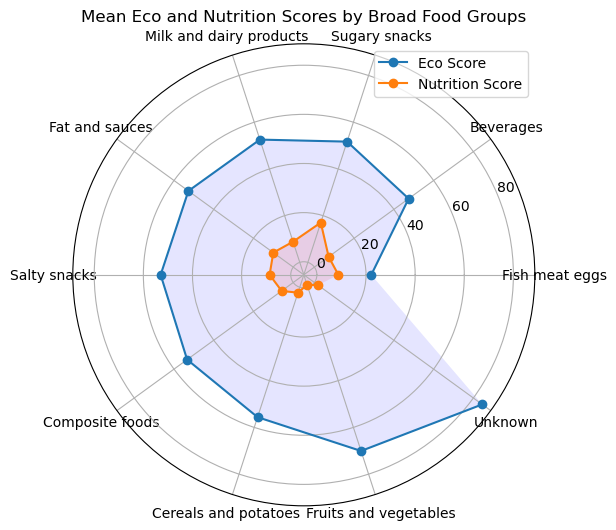

In [15]:
# Adjust figure size
plt.figure(figsize=(10, 6))

categories = spider_df.index.tolist()
values_eco = spider_df['Mean Eco Score'].values
values_nutri = spider_df['Mean Nutrition Score'].values

# Create a radar chart
ax = plt.subplot(111, polar=True)

# Calculate angles for each category
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

# Plot eco scores
ax.plot(angles, values_eco, label='Eco Score', marker='o')
ax.fill(angles, values_eco, 'b', alpha=0.1)

# Plot nutrition scores
ax.plot(angles, values_nutri, label='Nutrition Score', marker='o')
ax.fill(angles, values_nutri, 'r', alpha=0.1)

# Add labels and title
plt.title('Mean Eco and Nutrition Scores by Broad Food Groups')
plt.legend(loc='upper right')
plt.xticks(angles, categories)

# Show plot
plt.show()

# Nutrition Score vs. Eco Score by Food Group Trends

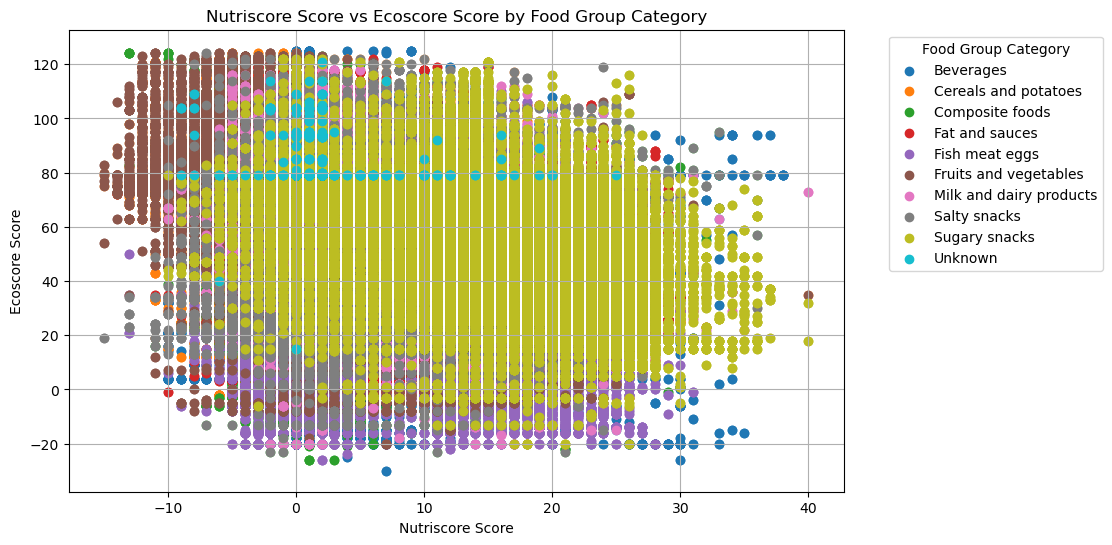

In [16]:
# Plot scatterplot colored by food_group_category
plt.figure(figsize=(10, 6))
for category, group in df.groupby('food_group_category'):
    plt.scatter(group['nutriscore_score'], group['ecoscore_score'], label=category)

plt.xlabel('Nutriscore Score')
plt.ylabel('Ecoscore Score')
plt.title('Nutriscore Score vs Ecoscore Score by Food Group Category')
plt.legend(title='Food Group Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

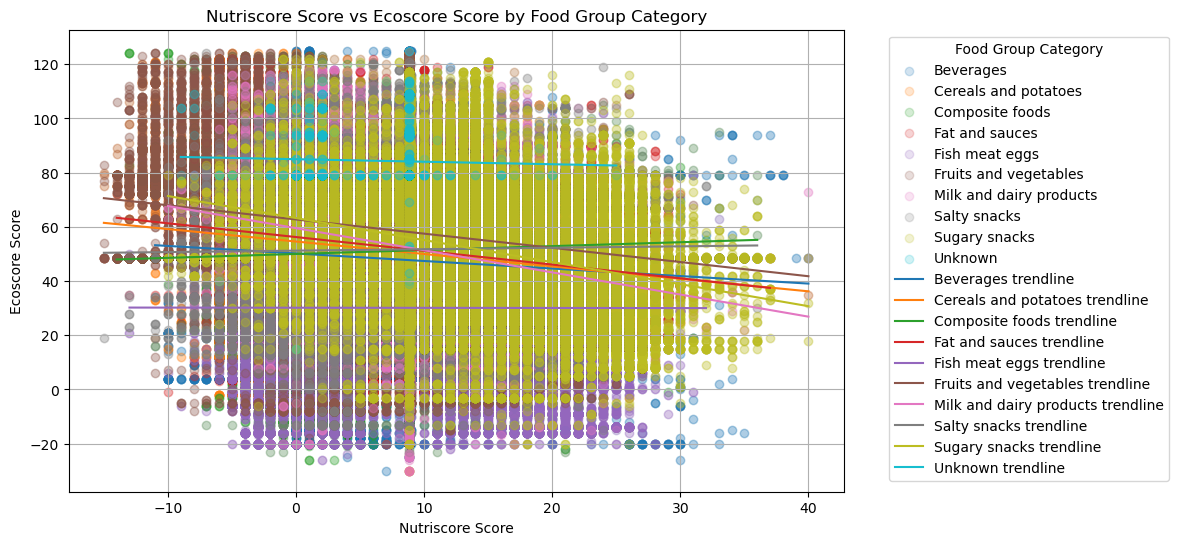

In [17]:
# add trendlines

df1 = df

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df1[['nutriscore_score', 'ecoscore_score']] = imputer.fit_transform(df1[['nutriscore_score', 'ecoscore_score']])


# Plot scatterplot colored by food_group_category
plt.figure(figsize=(10, 6))
for category, group in df1.groupby('food_group_category'):
    plt.scatter(group['nutriscore_score'], group['ecoscore_score'], label=category, alpha=0.2)
    


# Perform ridge regression and plot trend lines
for category, group in df1.groupby('food_group_category'):
    X = group[['nutriscore_score']].values
    y = group['ecoscore_score'].values
    
    # Perform ridge regression
    ridge = Ridge(alpha=0.1)  # Adjust alpha as needed
    ridge.fit(X, y)
    
    # Plot trend line
    x_values = np.linspace(min(group['nutriscore_score']), max(group['nutriscore_score']), 100)
    y_values = ridge.predict(x_values.reshape(-1, 1))
    plt.plot(x_values, y_values, label=f'{category} trendline')

plt.xlabel('Nutriscore Score')
plt.ylabel('Ecoscore Score')
plt.title('Nutriscore Score vs Ecoscore Score by Food Group Category')
plt.legend(title='Food Group Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

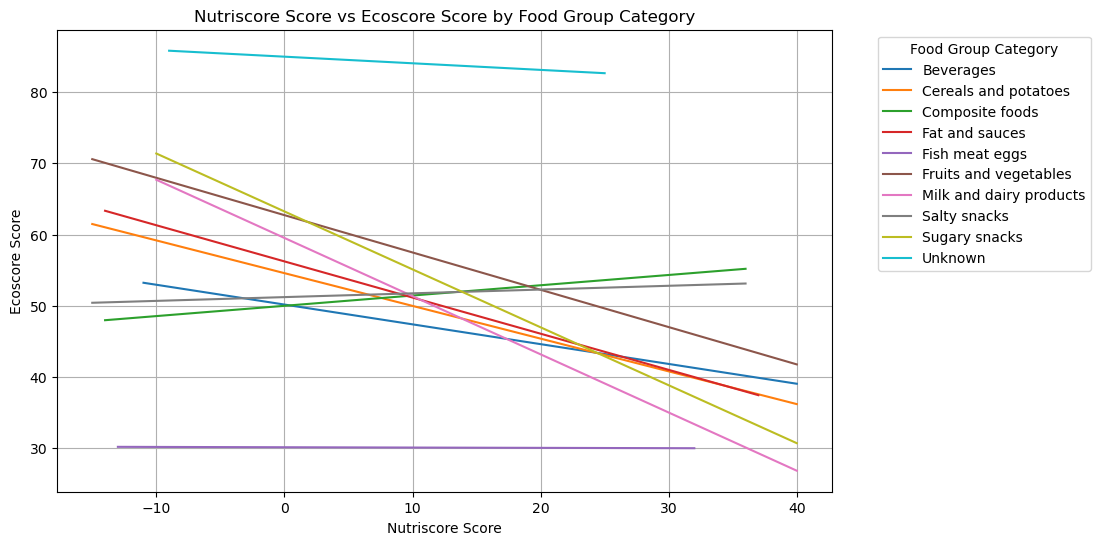

In [18]:
#  Without points 

df1 = df

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df1[['nutriscore_score', 'ecoscore_score']] = imputer.fit_transform(df1[['nutriscore_score', 'ecoscore_score']])


# Plot scatterplot colored by food_group_category
plt.figure(figsize=(10, 6))
#for category, group in df1.groupby('food_group_category'):
 #   plt.scatter(group['nutriscore_score'], group['ecoscore_score'], label=category, alpha=0.2)
    


# Perform ridge regression and plot trend lines
for category, group in df1.groupby('food_group_category'):
    X = group[['nutriscore_score']].values
    y = group['ecoscore_score'].values
    
    # Perform ridge regression
    ridge = Ridge(alpha=0.1)  # Adjust alpha as needed
    ridge.fit(X, y)
    
    # Plot trend line
    x_values = np.linspace(min(group['nutriscore_score']), max(group['nutriscore_score']), 100)
    y_values = ridge.predict(x_values.reshape(-1, 1))
    plt.plot(x_values, y_values, label=f'{category}')

plt.xlabel('Nutriscore Score')
plt.ylabel('Ecoscore Score')
plt.title('Nutriscore Score vs Ecoscore Score by Food Group Category')
plt.legend(title='Food Group Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

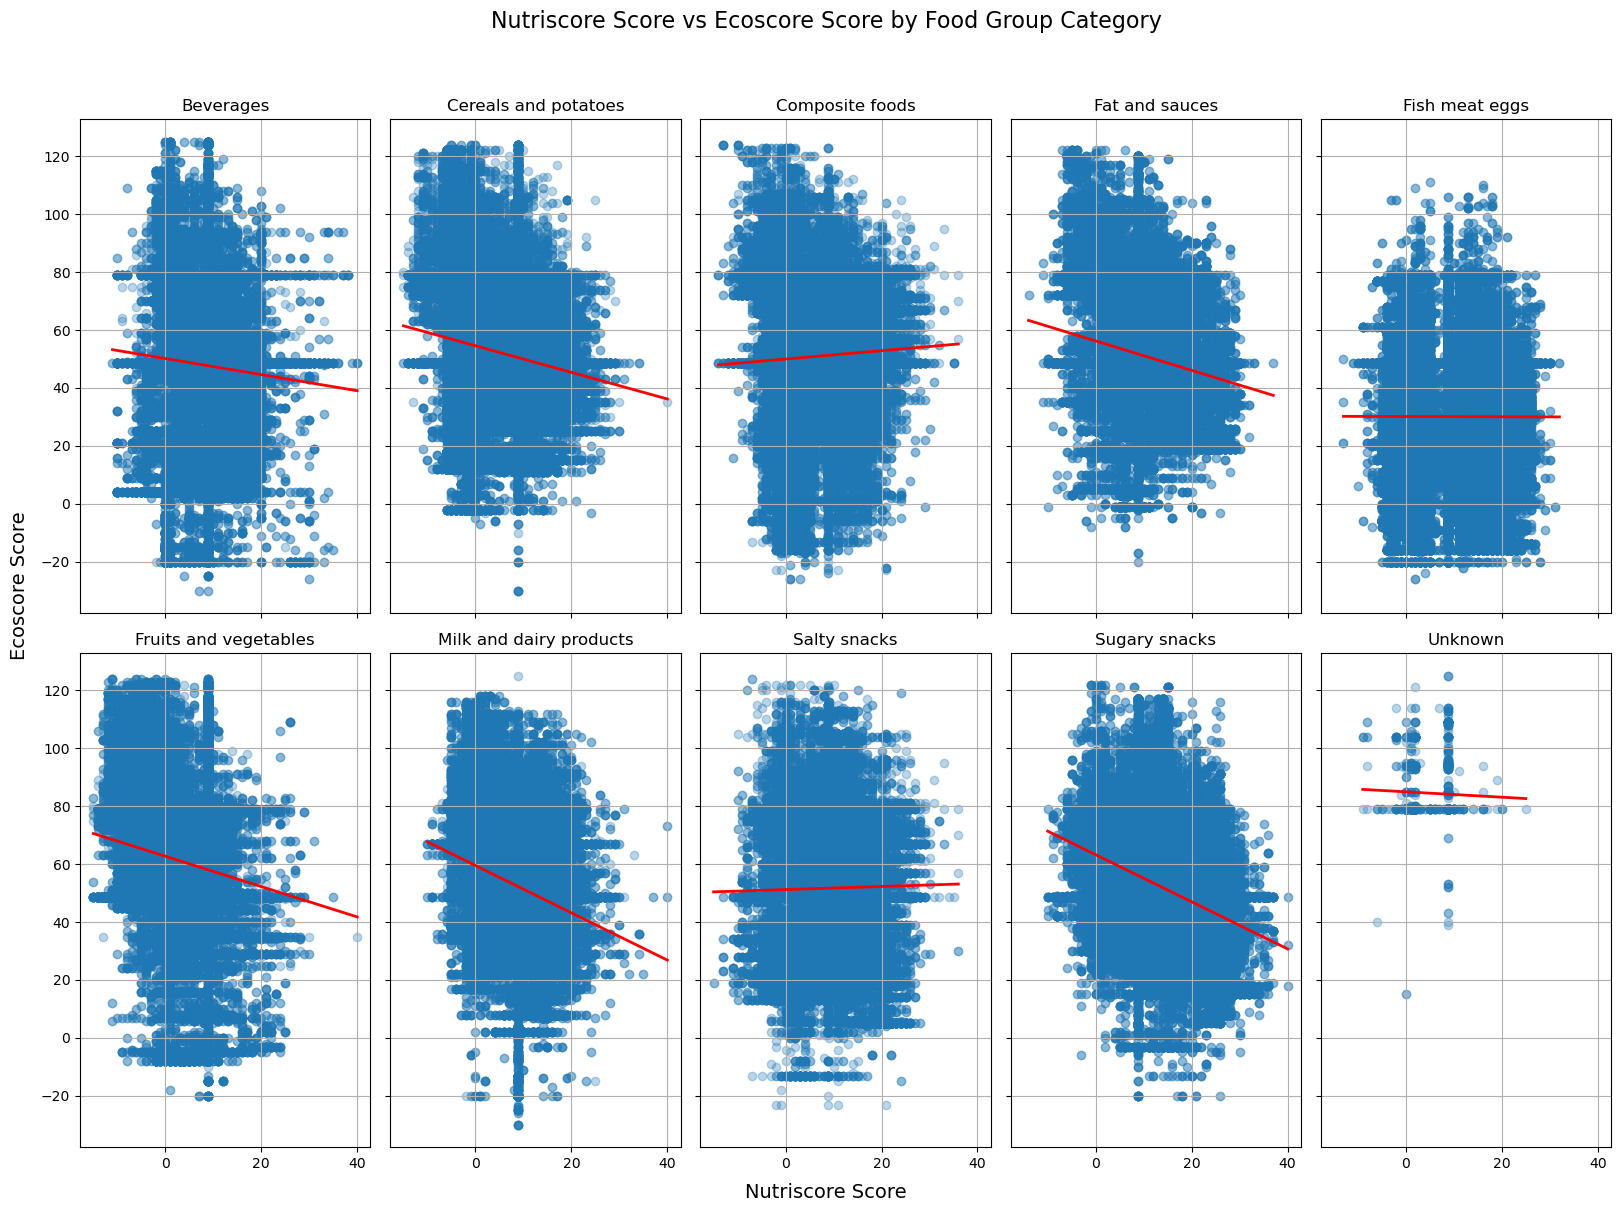

In [19]:
# Plot each food group category in its own subplot to make it more clear
fig, axs = plt.subplots(2, 5, figsize=(16, 12), sharex=True, sharey=True)
axs = axs.flatten()

for ax, (category, group) in zip(axs, df1.groupby('food_group_category')):
    ax.scatter(group['nutriscore_score'], group['ecoscore_score'], label=category, alpha=0.3)

    # Perform ridge regression and plot trend line
    X = group[['nutriscore_score']].values
    y = group['ecoscore_score'].values
    ridge = Ridge(alpha=0.1)  # Adjust alpha as needed
    ridge.fit(X, y)
    x_values = np.linspace(min(group['nutriscore_score']), max(group['nutriscore_score']), 100)
    y_values = ridge.predict(x_values.reshape(-1, 1))
    ax.plot(x_values, y_values, label=f'{category} trendline', color='red', linewidth=2)

    ax.set_title(category)
    ax.grid(True)

# Add x and y labels to the full figure
fig.text(0.5, -0.01, 'Nutriscore Score', ha='center', fontsize=14)
fig.text(-0.01, 0.5, 'Ecoscore Score', va='center', rotation='vertical', fontsize=14)

fig.suptitle('Nutriscore Score vs Ecoscore Score by Food Group Category', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust subplot layout to prevent overlap
plt.show()

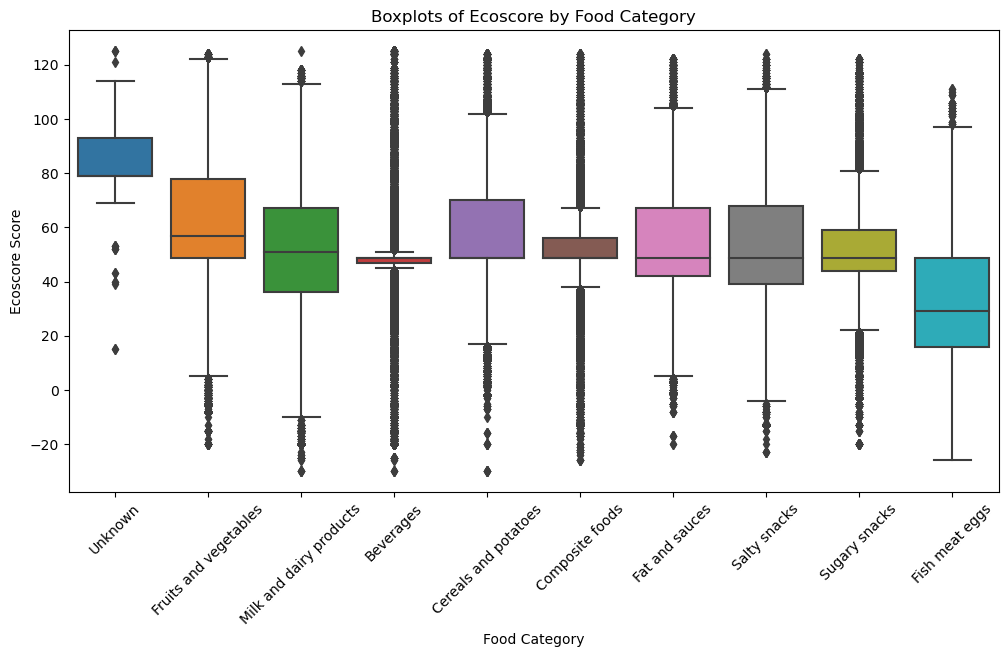

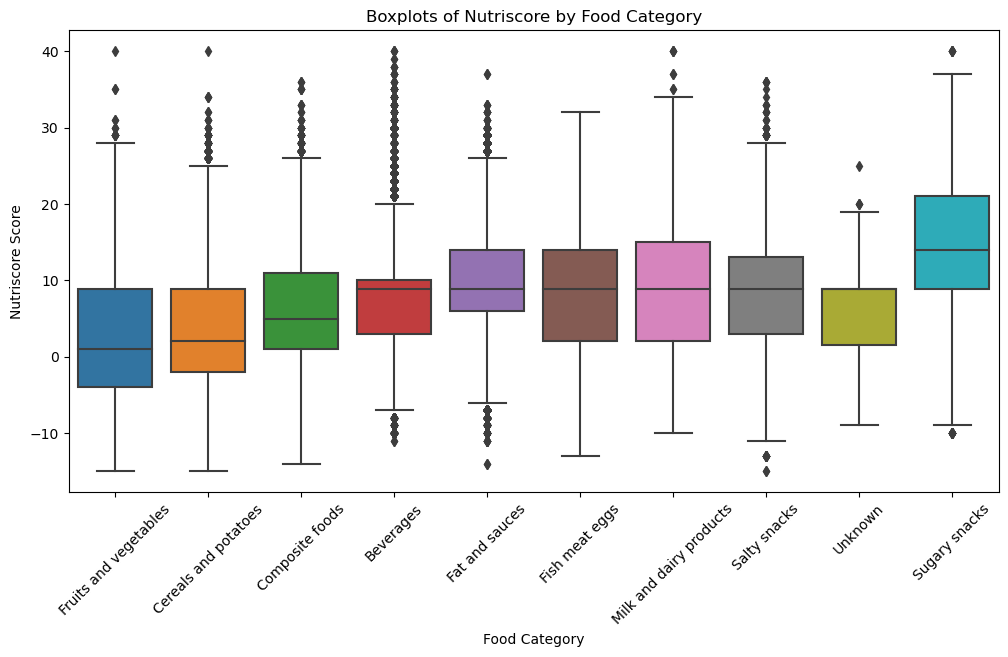

In [20]:
# Calculate median scores for each food category
median_ecoscore = df.groupby('food_group_category')['ecoscore_score'].median().sort_values(ascending=False).index
median_nutriscore = df.groupby('food_group_category')['nutriscore_score'].median().sort_values().index


# Plot boxplots for each food category based on ecoscore
plt.figure(figsize=(12, 6))
sns.boxplot(x='food_group_category', y='ecoscore_score', data=df, order=median_ecoscore)
plt.title('Boxplots of Ecoscore by Food Category')
plt.xticks(rotation=45)
plt.xlabel('Food Category')
plt.ylabel('Ecoscore Score')
plt.show()

# Plot boxplots for each food category based on nutriscore
plt.figure(figsize=(12, 6))
sns.boxplot(x='food_group_category', y='nutriscore_score', data=df, order=median_nutriscore)
plt.title('Boxplots of Nutriscore by Food Category')
plt.xticks(rotation=45)
plt.xlabel('Food Category')
plt.ylabel('Nutriscore Score')
plt.show()

In [21]:
# Note: in general, as nutriscore goes up, ecoscore goes down 
# with exception for beverages, composite foods, and fish/mean/eggs

In [22]:
# Looking at only grade a foods (only 284 in this subset that are both a in eco and nutri)

In [23]:
grade_a = df[(df['ecoscore_grade']=='a') & (df['nutriscore_grade']=='a')]
grade_a

,code,food_groups_en_x,countries_en_x,product_name,countries_en_y,brands,abbreviated_product_name,generic_name,quantity,ecoscore_score,...,nutriscore_grade,nova_group,food_groups_en_y,sodium_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,proteins_100g,food_group_category
620,00005006,fats and sauces,belgium,Sauce Tomate Aux Champignons Bio Kazidomi,"Belgium,France",Kazidomi,NaN,Sauce Tomate Aux Champignons,300 g,100.0,...,a,3.0,"Fats and sauces,Dressings and sauces",0.280,2.3,0.4,4.0,4.8,1.7,Fat and sauces
621,00005006,fats and sauces,france,Sauce Tomate Aux Champignons Bio Kazidomi,"Belgium,France",Kazidomi,NaN,Sauce Tomate Aux Champignons,300 g,100.0,...,a,3.0,"Fats and sauces,Dressings and sauces",0.280,2.3,0.4,4.0,4.8,1.7,Fat and sauces
622,00005006,dressings and sauces,belgium,Sauce Tomate Aux Champignons Bio Kazidomi,"Belgium,France",Kazidomi,NaN,Sauce Tomate Aux Champignons,300 g,100.0,...,a,3.0,"Fats and sauces,Dressings and sauces",0.280,2.3,0.4,4.0,4.8,1.7,Fat and sauces
623,00005006,dressings and sauces,france,Sauce Tomate Aux Champignons Bio Kazidomi,"Belgium,France",Kazidomi,NaN,Sauce Tomate Aux Champignons,300 g,100.0,...,a,3.0,"Fats and sauces,Dressings and sauces",0.280,2.3,0.4,4.0,4.8,1.7,Fat and sauces
624,00005007,fats and sauces,belgium,Sauce Tomate Puttanesca Bio Kazidomi,"Belgium,France",Kazidomi,NaN,Sauce Tomate Puttanesca,300 g,100.0,...,a,3.0,"Fats and sauces,Dressings and sauces",0.080,5.2,0.8,3.8,4.3,1.5,Fat and sauces
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538550,9674061803378,milk and yogurt,switzerland,Just Yogurt & Fruits,Switzerland,YOU,NaN,NaN,150 g,87.0,...,a,1.0,"Milk and dairy products,Milk and yogurt",0.032,3.0,1.7,8.8,9.0,4.2,Milk and dairy products
2539189,9788472397927,fruits and vegetables,spain,Gazpacho,Spain,Hacendado,NaN,NaN,NaN,83.0,...,a,NaN,"Fruits and vegetables,Soups",0.160,0.1,0.1,0.5,1.0,6.0,Fruits and vegetables
2539190,9788472397927,soups,spain,Gazpacho,Spain,Hacendado,NaN,NaN,NaN,83.0,...,a,NaN,"Fruits and vegetables,Soups",0.160,0.1,0.1,0.5,1.0,6.0,Composite foods
2539964,990530101078834382,milk and dairy products,france,Skyr bio nature,France,Skyr,NaN,NaN,NaN,87.0,...,a,NaN,"Milk and dairy products,Dairy desserts",0.036,0.2,0.1,3.9,3.9,10.0,Milk and dairy products


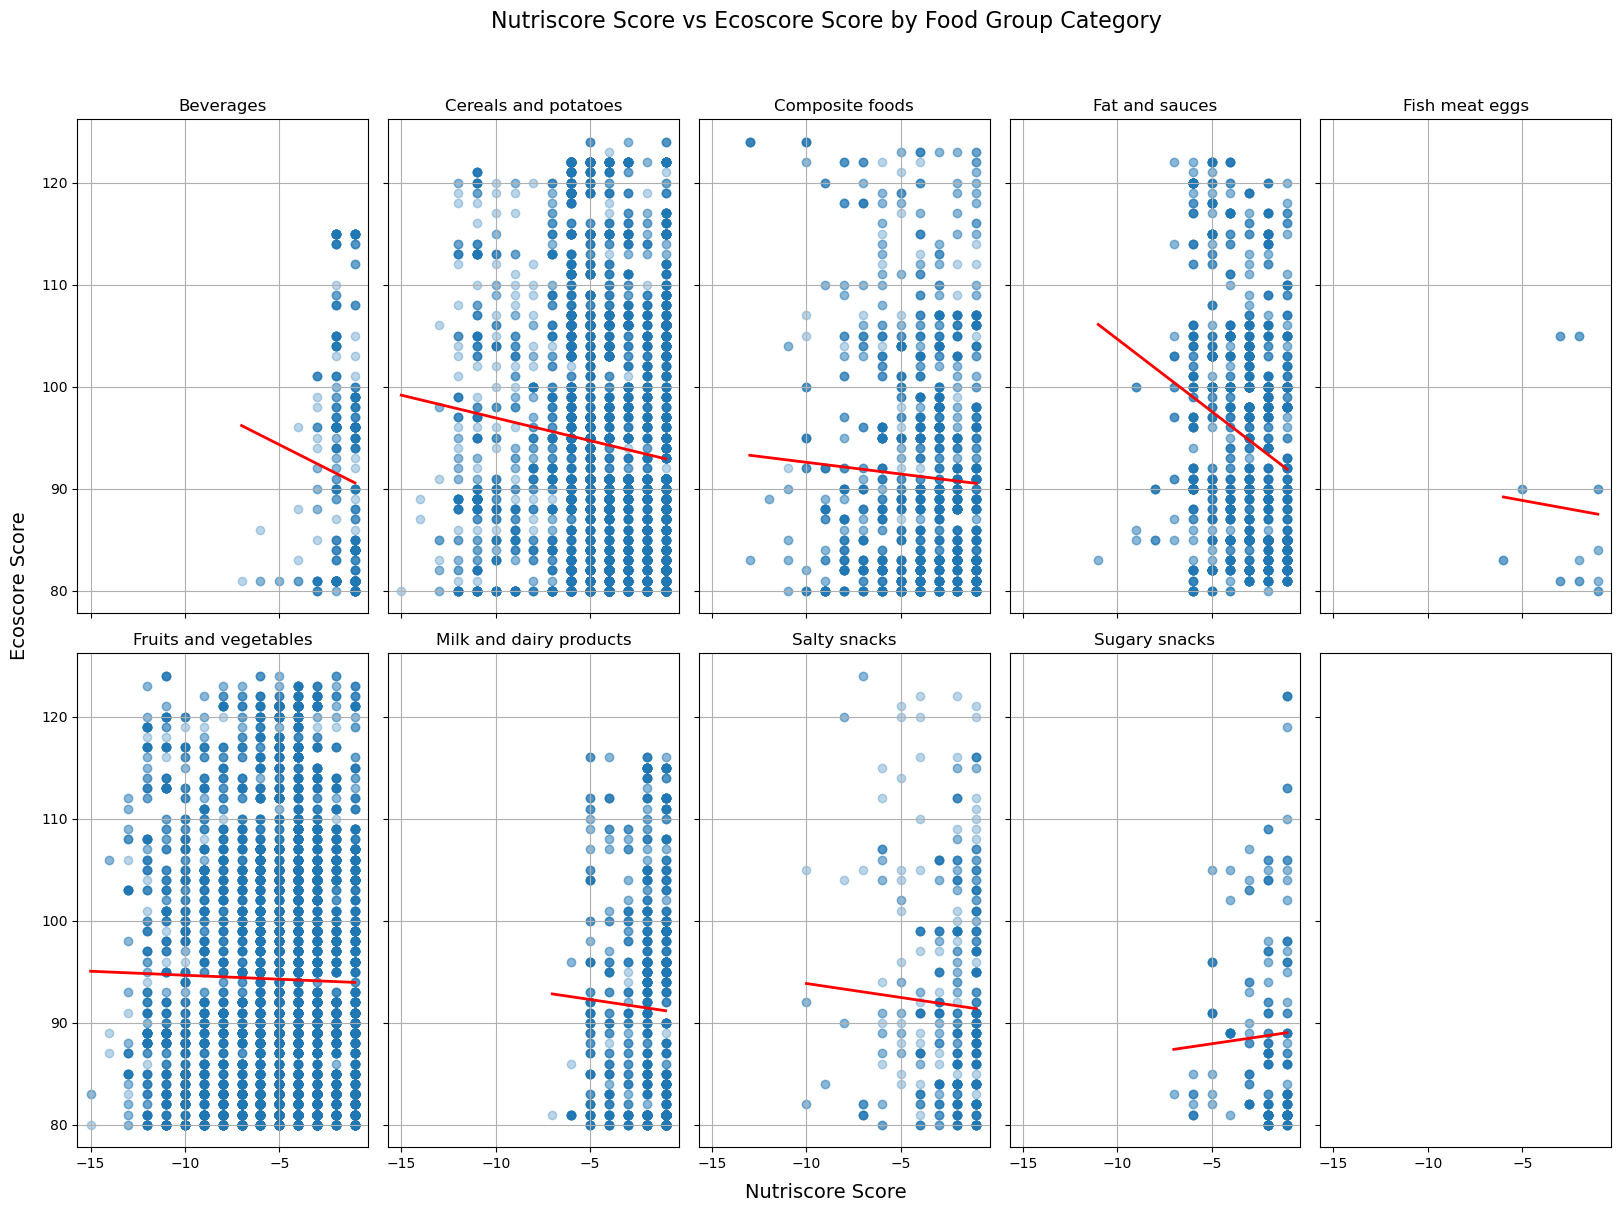

In [24]:
# Plot each food group category in its own subplot to make it more clear
fig, axs = plt.subplots(2, 5, figsize=(16, 12), sharex=True, sharey=True)
axs = axs.flatten()

for ax, (category, group) in zip(axs, grade_a.groupby('food_group_category')):
    ax.scatter(group['nutriscore_score'], group['ecoscore_score'], label=category, alpha=0.3)

    # Perform ridge regression and plot trend line
    X = group[['nutriscore_score']].values
    y = group['ecoscore_score'].values
    ridge = Ridge(alpha=0.1)  # Adjust alpha as needed
    ridge.fit(X, y)
    x_values = np.linspace(min(group['nutriscore_score']), max(group['nutriscore_score']), 100)
    y_values = ridge.predict(x_values.reshape(-1, 1))
    ax.plot(x_values, y_values, label=f'{category} trendline', color='red', linewidth=2)

    ax.set_title(category)
    ax.grid(True)

# Add x and y labels to the full figure
fig.text(0.5, -0.01, 'Nutriscore Score', ha='center', fontsize=14)
fig.text(-0.01, 0.5, 'Ecoscore Score', va='center', rotation='vertical', fontsize=14)

fig.suptitle('Nutriscore Score vs Ecoscore Score by Food Group Category', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust subplot layout to prevent overlap
plt.show()

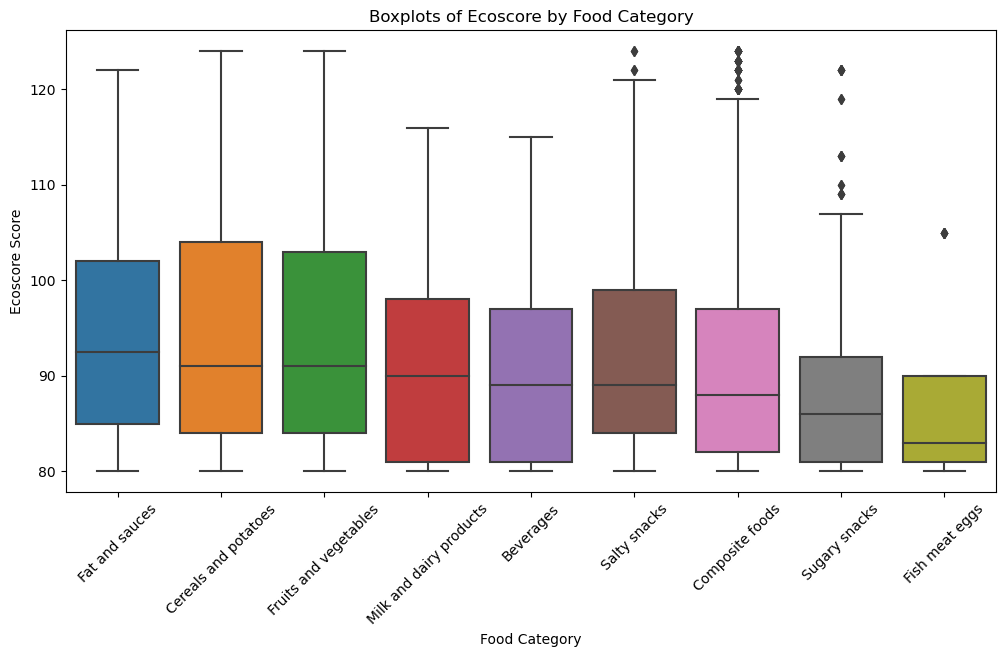

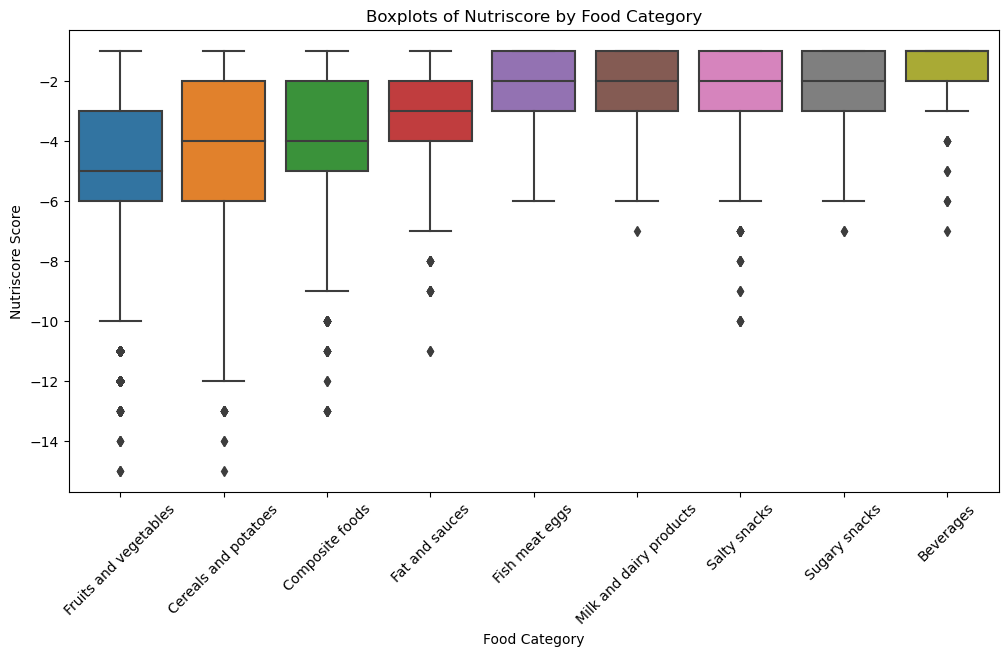

In [25]:
# Calculate median scores for each food category
median_ecoscore = grade_a.groupby('food_group_category')['ecoscore_score'].median().sort_values(ascending=False).index
median_nutriscore = grade_a.groupby('food_group_category')['nutriscore_score'].median().sort_values().index

# Plot boxplots for each food category based on ecoscore
plt.figure(figsize=(12, 6))
sns.boxplot(x='food_group_category', y='ecoscore_score', data=grade_a, order=median_ecoscore)
plt.title('Boxplots of Ecoscore by Food Category')
plt.xticks(rotation=45)
plt.xlabel('Food Category')
plt.ylabel('Ecoscore Score')
plt.show()

# Plot boxplots for each food category based on nutriscore
plt.figure(figsize=(12, 6))
sns.boxplot(x='food_group_category', y='nutriscore_score', data=grade_a, order=median_nutriscore)
plt.title('Boxplots of Nutriscore by Food Category')
plt.xticks(rotation=45)
plt.xlabel('Food Category')
plt.ylabel('Nutriscore Score')
plt.show()

# Now look at top brands, products, countries

In [26]:
# Get the top occurencies function
def get_top_occurencies(df, cols, n=10):
    count = df.groupby(cols).size().sort_values(ascending=False)
    count_percent = round(count / df.shape[0] * 100, 2)
    return pd.DataFrame({'count': count, 'count %': count_percent}).head(n)

In [27]:
get_top_occurencies(df, 'countries_en_x', n=10)
### IMPORTANT TO NOTE: >90% of data is from france in this subset!!

,count,count %
countries_en_x,,
france,956410,37.65
united states,520809,20.50
spain,191489,7.54
germany,188017,7.40
italy,139483,5.49
switzerland,85862,3.38
belgium,70525,2.78
united kingdom,67646,2.66
canada,30595,1.20


In [28]:
get_top_occurencies(df, 'product_name', n=10)
# most of these are in french bc 90% of data is from france! Important to note

,count,count %
product_name,,
Filet de poulet,3545,0.14
Miel,2891,0.11
Aceite de oliva virgen extra,2696,0.11
Filets de poulet,2321,0.09
Escalope de dinde,2154,0.08
Spaghetti,2142,0.08
Comté,1984,0.08
Panettone,1842,0.07
Aiguillettes de poulet,1698,0.07


In [29]:
get_top_occurencies(df, 'brands', n=10)

,count,count %
brands,,
Carrefour,34482,1.36
Auchan,26853,1.06
U,12312,0.48
Delhaize,9944,0.39
Hacendado,8578,0.34
Coop,8486,0.33
Casino,8304,0.33
Lidl,8084,0.32
Le Gaulois,7453,0.29
